Sandbox to learn how to make animations. Very messy. Weird animations. 

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc, rcParams
from IPython.display import HTML

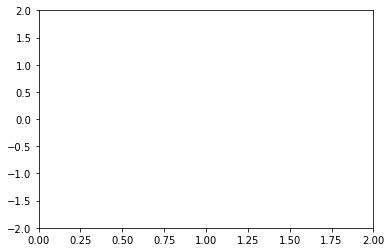

In [2]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [3]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [4]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [5]:
rc('animation', html='html5')

In [6]:
anim

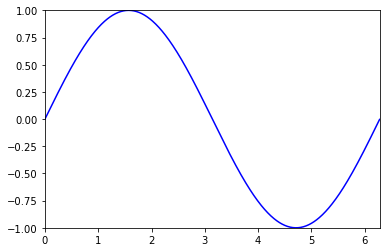

In [7]:
fig = plt.figure()
x = np.arange(0, 2*np.pi, 0.01)
plt.plot(x, np.sin(x),'b')
plt.axis([0,2*np.pi,-1,1])
plt.show()


In [8]:
def animate_sine(t):
    plt.plot(x,np.sin(x+t/10.0),'b') 
    plt.axis([0,2*np.pi,-1,1])

In [9]:
fig=plt.figure()
ani = animation.FuncAnimation(fig,animate_sine, frames=200)
plt.show()

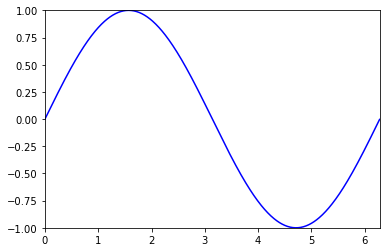

In [11]:
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig,animate_sine, frames=200)
plt.show()

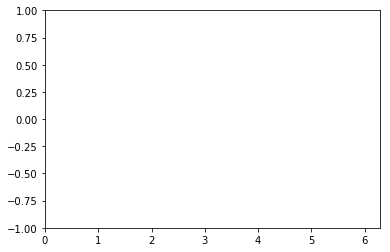

In [13]:
fig,ax = plt.subplots()

#An empty plot
pl,=ax.plot([],[])
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-1,1])

#animate funcion
def animate_sine(t):
    pl.set_data(x,np.sin(x+t/10.0)) 
    return pl,

#set a clear initial frame
def init():
    pl.set_data([],[])
    return pl,

#blit=True to remove instances from previous frames
ani = animation.FuncAnimation(fig,animate_sine, frames=200, init_func=init, blit=True)
plt.show()

In [14]:
ani

In [16]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import netCDF4 as nc
from salishsea_tools import (nc_tools, viz_tools, gsw_calls)
import numpy.ma as ma
import glob
%matplotlib inline

In [17]:
mesh_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
new_domain = mesh_mask.variables['tmask'][0,:,334:898,114:398]   

In [18]:
Jan04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan0.4/SalishSea_1h_20170101_20170107_grid_T.nc')
JanN04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJan-0.4/SalishSea_1h_20170101_20170107_grid_T.nc')
Jun04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun0.4/SalishSea_1h_20160601_20160607_grid_T.nc')
JunN04 = nc.Dataset('/ocean/vdo/MEOPAR/completed-runs/SalishSeaLake/LakeJun-0.4/SalishSea_1h_20160601_20160607_grid_T.nc')

In [22]:
pressure1 = gsw_calls.generic_gsw_caller('gsw_p_from_z.m',
                                        [-np.expand_dims(Jan04.variables['deptht'][:], 1) * np.ones(284),
                                        (np.ones([284,40]) *np.expand_dims(Jan04.variables['nav_lat'][350,:][:],1)).T])
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][47,:,350,:],
                                        Jan04.variables['votemper'][47,:,350,:],
                                        pressure1])
masked_density1 = ma.masked_array(density1, mask = 1 - new_domain[:,350,:])

(10, 85)

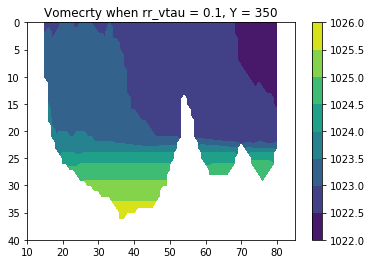

In [91]:
fig,ax1=plt.subplots(1,1)
den = ax1.contourf(masked_density1 #, colors='black'
            )
fig.colorbar(den, ax=ax1)
ax1.set_title('Vomecrty when rr_vtau = 0.1, Y = 350')
ax1.set_ylim((40,0))
ax1.set_xlim((10,85))

In [23]:
mask = 1 - new_domain[:,350,:]
def animate_density(t):
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][t,:,350,:],
                                        Jan04.variables['votemper'][t,:,350,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    
    fig,ax1=plt.subplots(1,1)
    den = ax1.contourf(masked_density1 #, colors='black'
            )
    fig.colorbar(den, ax=ax1)
    ax1.set_ylim((40,0))
    ax1.set_xlim((10,85))

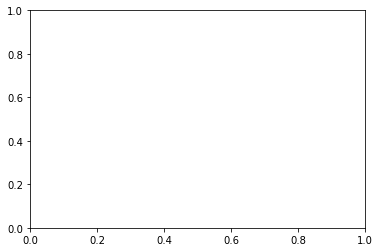

In [27]:
fig,ax = plt.subplots(1,1)
def init():
    pl.set_data([],[])
    return pl,

#blit=True to remove instances from previous frames
ani = animation.FuncAnimation(fig,animate_density, frames=100, init_func=init, blit=True)
plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

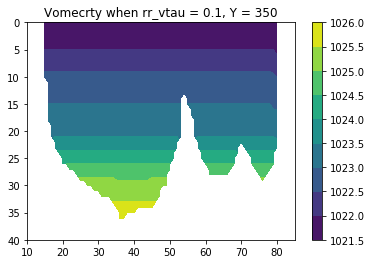

In [28]:
ani

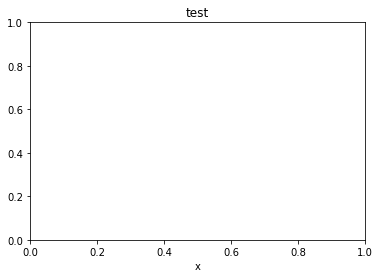

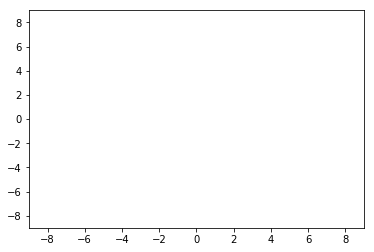

In [29]:
def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
    interval=50, blit=True)
#line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
    blit=True)
#im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

In [30]:
im_ani

In [31]:
line_ani

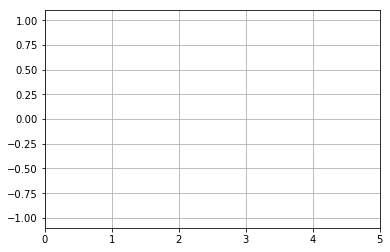

In [32]:
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)
data_gen.t = 0

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,
    repeat=False)

In [33]:
ani

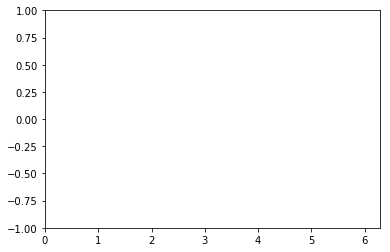

In [38]:
fig,ax = plt.subplots()

#An empty plot
pl,=ax.plot([],[])
ax.set_xlim([0,2*np.pi])
ax.set_ylim([-1,1])

#animate funcion
def animate_sine(t):
    pl.set_data(x,np.sin(x+t/10.0)) 
    return pl,

#set a clear initial frame
def init():
    pl.set_data([],[])
    return pl,

#blit=True to remove instances from previous frames
ani = animation.FuncAnimation(fig,animate_sine, frames=200, init_func=init, blit=True)
plt.show()

In [39]:
ani

# WORKING

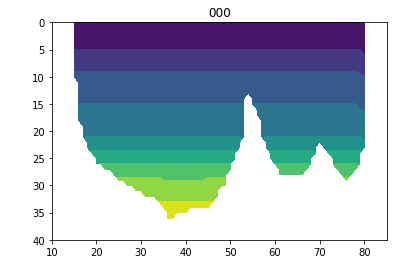

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(masked_density1 #, colors='black'
            )
    fig.colorbar(den, ax=ax1)
    ax.set_ylim((40,0))
    ax.set_xlim((10,85))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 2#in seconds     
ani2 = animation.FuncAnimation(fig,animate,5,interval=interval*1e+3,blit=False)

In [95]:
ani2

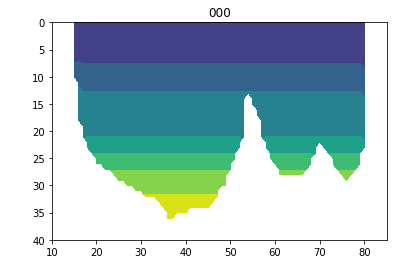

In [125]:
fig,ax = plt.subplots()

def animate2(i):
    ax.clear()
    density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1])
    masked_density1 = ma.masked_array(density1, mask = mask)
    den = ax.contourf(masked_density1, levels = np.linspace(1021, 1026, 9) #, colors='black'
            )
    ax.set_ylim((40,0))
    ax.set_xlim((10,85))
    ax.set_title('%03d'%(i)) 
    return ax

interval = 2#in seconds     
ani3 = animation.FuncAnimation(fig,animate2,5,interval=interval*1e+3,blit=False)

In [126]:
ani3

In [127]:
mywriter = animation.FFMpegWriter(fps=50)

(1, 100)

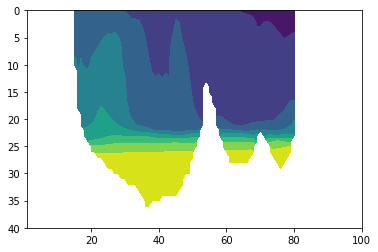

In [140]:
plt.contourf(ma.masked_array(Jan04.variables['vosaline'][72,:,350,:], mask=mask))
plt.ylim(40,0)
plt.xlim(1,100)

(1, 100)

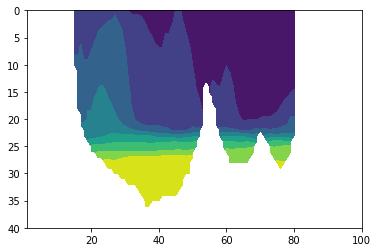

In [141]:
plt.contourf(ma.masked_array(Jan04.variables['votemper'][72,:,350,:], mask=mask))
plt.ylim(40,0)
plt.xlim(1,100)

In [142]:
def calc_rho(Sal, TempC, P):
    """ Calculate rho: Based on SOG code
    """
    
    # Calculate the square root of the salinities
    sqrSal = np.sqrt(Sal)

    # Calculate the density profile at the grid point depths
    # Pure water density at atmospheric pressure
    # (Bigg P.H., (1967) Br. J. Applied Physics 8 pp 521-537)
    R1 = ((((6.536332e-9 * TempC - 1.120083e-6) * TempC + 1.001685e-4)
           * TempC - 9.095290e-3) * TempC + 6.793952e-2) * TempC - 28.263737
    R2 = (((5.3875e-9 * TempC - 8.2467e-7) * TempC + 7.6438e-5)
          * TempC - 4.0899e-3) * TempC + 8.24493e-1
    R3 = (-1.6546e-6 * TempC + 1.0227e-4) * TempC - 5.72466e-3

    # International one-atmosphere equation of state of seawater
    SIG = (4.8314e-4 * Sal + R3 * sqrSal + R2) * Sal + R1

    # Specific volume at atmospheric pressure
    V350P = 1.0 / 1028.1063
    SVA   = -SIG * V350P / (1028.1063 + SIG)

    # Density anomoly at atmospheric pressure
    rho = 28.106331 - SVA / (V350P * (V350P + SVA)) + 1000
    
    return rho

In [145]:
%%timeit
rho1 = calc_rho(Jan04.variables['vosaline'][0,:,350,:],
                                        Jan04.variables['votemper'][0,:,350,:],
                                        pressure1)

1 loop, best of 3: 284 ms per loop


In [146]:
%%timeit
i=0
density1 = gsw_calls.generic_gsw_caller('gsw_rho.m',
                                       [Jan04.variables['vosaline'][i,:,350,:],
                                        Jan04.variables['votemper'][i,:,350,:],
                                        pressure1])

1 loop, best of 3: 4.21 s per loop


In [149]:
rho1.shape

(40, 284)